In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Data Loading and Inspection

In [3]:
#Load datasets
personnel = pd.read_csv("drive/MyDrive/russia_losses_personnel.csv")
equipment = pd.read_csv("drive/MyDrive/russia_losses_equipment.csv")
corrections = pd.read_csv("drive/MyDrive/russia_losses_equipment_correction.csv")

In [4]:
personnel.head()

,date,day,personnel,personnel*,POW
0,2025-07-13,1236,1033930,about,NaN
1,2025-07-12,1235,1032690,about,NaN
2,2025-07-11,1234,1031620,about,NaN
3,2025-07-10,1233,1030580,about,NaN
4,2025-07-09,1232,1029660,about,NaN


In [5]:
equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2025-07-13,1236,421,340,11016,22983,30243,1438,NaN,NaN,45511,28,1194,3929.0,NaN,NaN,54923.0,3491.0,1.0
1,2025-07-12,1235,421,340,11013,22980,30194,1437,NaN,NaN,45248,28,1193,3929.0,NaN,NaN,54822.0,3459.0,1.0
2,2025-07-11,1234,421,340,11013,22979,30163,1437,NaN,NaN,45003,28,1193,3929.0,NaN,NaN,54732.0,3459.0,1.0
3,2025-07-10,1233,421,340,11011,22972,30140,1437,NaN,NaN,44781,28,1193,3929.0,NaN,NaN,54656.0,3445.0,1.0
4,2025-07-09,1232,421,340,11000,22969,30102,1434,NaN,NaN,44457,28,1193,3929.0,NaN,NaN,54575.0,3439.0,1.0


In [6]:
corrections.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,submarines,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,personnel
0,2022-10-13,231,0,0,0,-25,32,0,20,1,0,0,0,0,0,0
1,2023-05-27,458,3,2,-5,7,8,2,49,0,0,0,0,11,31,0
2,2023-10-03,587,-1,0,5,0,0,0,-1,0,0,0,0,0,0,0
3,2024-03-13,749,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0
4,2024-05-05,802,0,0,0,5,43,1,0,0,0,0,-3,44,19,0


In [7]:
# Convert dates to datetime
for df in [personnel, equipment, corrections]:
    df['date'] = pd.to_datetime(df['date'])

# Apply corrections
for _, row in corrections.iterrows():
    date = row['date']
    # Apply equipment corrections
    for col in corrections.columns[2:-1]:  # Exclude date/day/personnel
        if not pd.isna(row[col]) and row[col] != 0:
            mask = equipment['date'] >= date
            equipment.loc[mask, col] += row[col]
    # Apply personnel corrections
    if not pd.isna(row['personnel']) and row['personnel'] != 0:
        mask = personnel['date'] >= date
        personnel.loc[mask, 'personnel'] += row['personnel']

In [8]:
# Calculate daily losses
personnel['daily_losses'] = personnel['personnel'].diff().fillna(personnel['personnel'].iloc[0])
equipment['daily_tanks'] = equipment['tank'].diff().fillna(equipment['tank'].iloc[0])
equipment['daily_drones'] = equipment['drone'].diff().fillna(equipment['drone'].iloc[0])

# Merge datasets
merged = pd.merge(personnel, equipment, on='date', suffixes=('_pers', '_eq'))

## Data Overview

In [9]:
print("Personnel Data:")
print(personnel.info())
print("\nEquipment Data:")
print(equipment.info())
print("\nCorrections Data:")
print(corrections.info())

Personnel Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1235 non-null   datetime64[ns]
 1   day           1235 non-null   int64         
 2   personnel     1235 non-null   int64         
 3   personnel*    1235 non-null   object        
 4   POW           62 non-null     float64       
 5   daily_losses  1235 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 58.0+ KB
None

Equipment Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       1235 non-null   datetime64[ns]
 1   day                        1235 non-null   int64         
 2   aircraft  

## Summary Statistics

In [10]:
print("\nPersonnel Summary Statistics:")
print(personnel[['personnel', 'daily_losses']].describe())

print("\nEquipment Summary Statistics:")
print(equipment[['tank', 'APC', 'field artillery', 'drone']].describe())


Personnel Summary Statistics:
          personnel  daily_losses
count  1.235000e+03  1.235000e+03
mean   3.875939e+05  2.267206e+00
std    3.105439e+05  2.949977e+04
min    2.800000e+03 -4.360000e+03
25%    1.056050e+05 -1.170000e+03
50%    3.041000e+05 -8.200000e+02
75%    6.246250e+05 -5.000000e+02
max    1.035740e+06  1.035740e+06

Equipment Summary Statistics:
               tank           APC  field artillery         drone
count   1235.000000   1235.000000      1235.000000   1235.000000
mean    5686.859919  11383.980567     10142.863158  10112.508502
std     3218.370097   6529.929731      9154.990911  11229.307829
min       80.000000    516.000000        49.000000      0.000000
25%     3027.500000   6042.000000      2045.000000   1763.000000
50%     5276.000000   9921.000000      7403.000000   5602.000000
75%     8634.000000  16874.500000     17872.000000  14924.000000
max    11018.000000  23009.000000     30409.000000  45651.000000


#Data Cleaning & Validation

In [11]:
print("Missing Values in Personnel Data:")
print(personnel.isnull().sum())

print("\nMissing Values in Equipment Data:")
print(equipment.isnull().sum())

Missing Values in Personnel Data:
date               0
day                0
personnel          0
personnel*         0
POW             1173
daily_losses       0
dtype: int64

Missing Values in Equipment Data:
date                            0
day                             0
aircraft                        0
helicopter                      0
tank                            0
APC                             0
field artillery                 0
MRL                             0
military auto                1170
fuel tank                    1170
drone                           0
naval ship                      0
anti-aircraft warfare           0
special equipment              19
mobile SRBM system           1199
greatest losses direction    1032
vehicles and fuel tanks        65
cruise missiles                65
submarines                    566
daily_tanks                     0
daily_drones                    0
dtype: int64


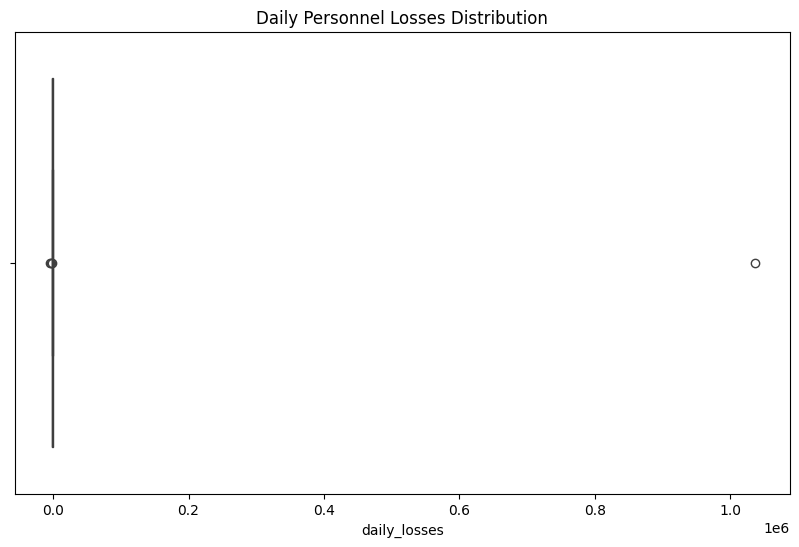

In [12]:
# Personnel daily losses outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=personnel['daily_losses'])
plt.title('Daily Personnel Losses Distribution')
plt.show()

# Univariate Analysis

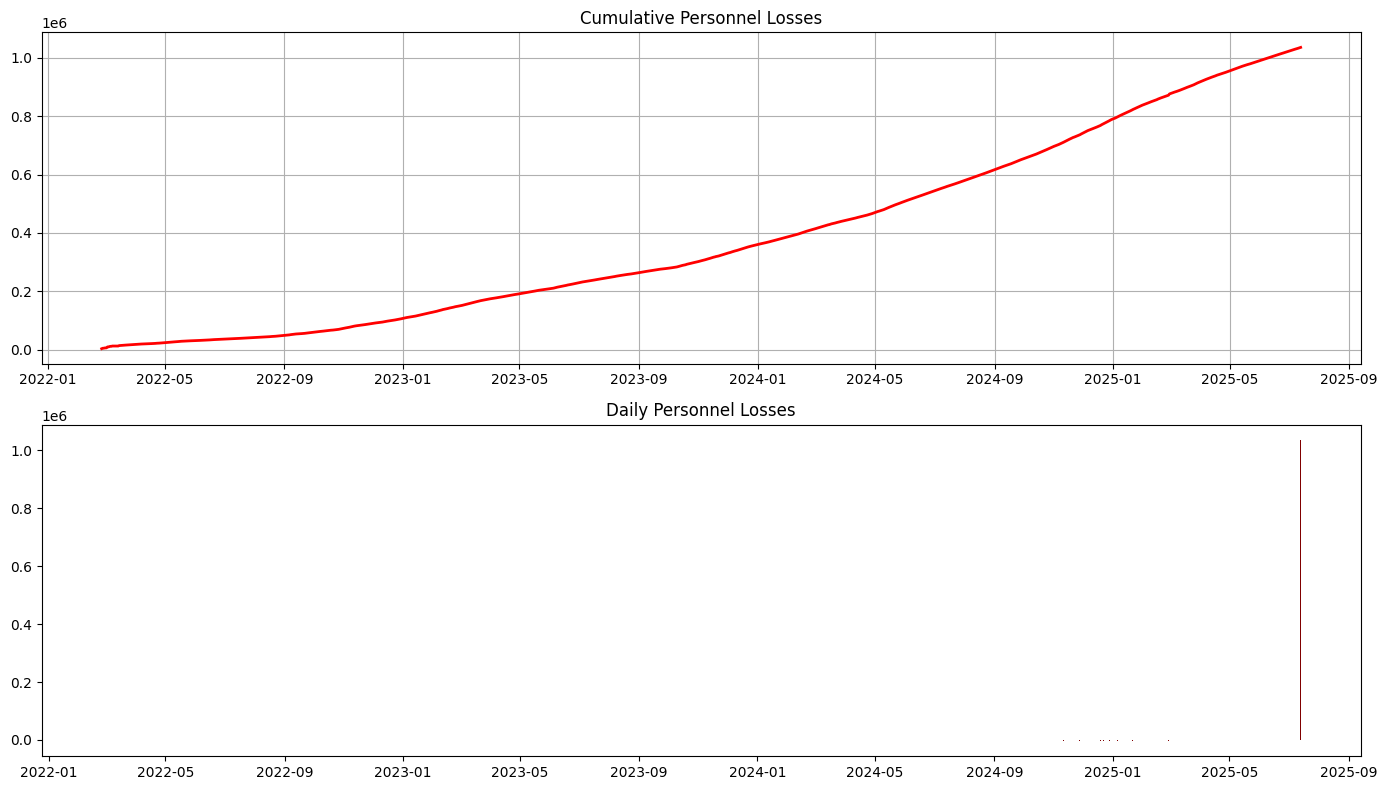

In [13]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(personnel['date'], personnel['personnel'], 'r-', linewidth=2)
plt.title('Cumulative Personnel Losses')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.bar(personnel['date'], personnel['daily_losses'], width=1.0, color='maroon')
plt.title('Daily Personnel Losses')
plt.tight_layout()
plt.show()

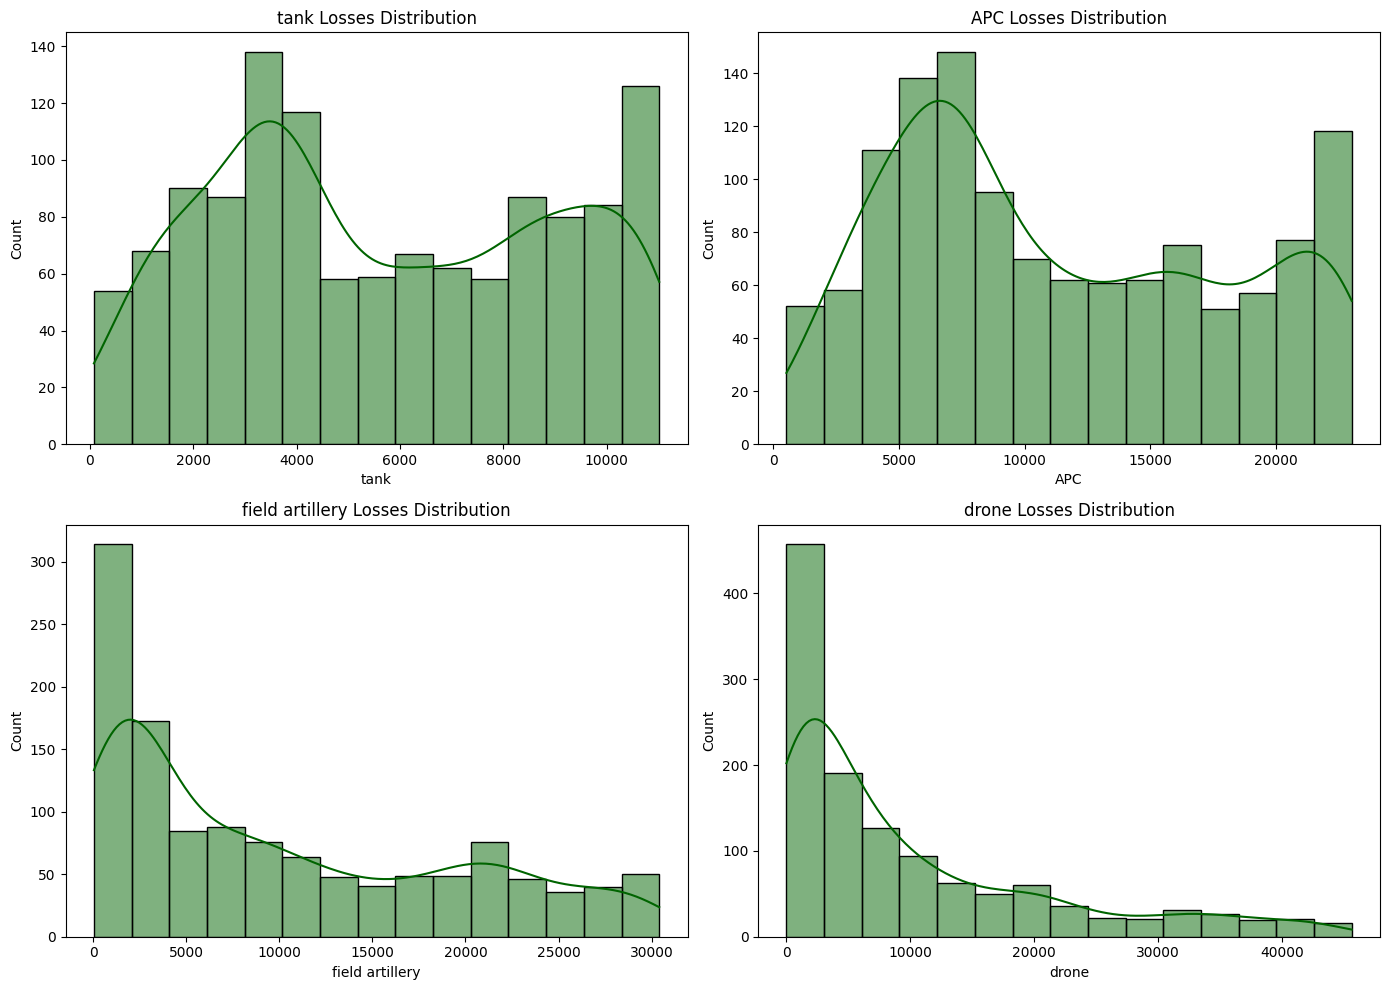

In [14]:
equipment_cols = ['tank', 'APC', 'field artillery', 'drone']
plt.figure(figsize=(14, 10))
for i, col in enumerate(equipment_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(equipment[col], kde=True, bins=15, color='darkgreen')
    plt.title(f'{col} Losses Distribution')
plt.tight_layout()
plt.show()

# Bivariate & Multivariate Analysis

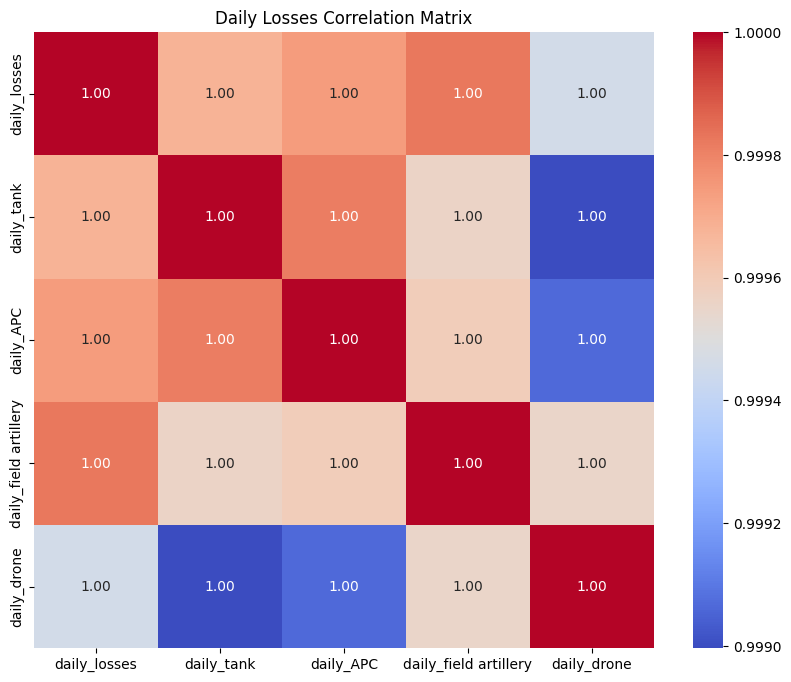

In [15]:
# Calculate daily equipment losses
for col in equipment_cols:
    merged[f'daily_{col}'] = merged[col].diff().fillna(merged[col].iloc[0])

# Correlation matrix
corr_matrix = merged[['daily_losses', 'daily_tank', 'daily_APC',
                      'daily_field artillery', 'daily_drone']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Daily Losses Correlation Matrix')
plt.show()

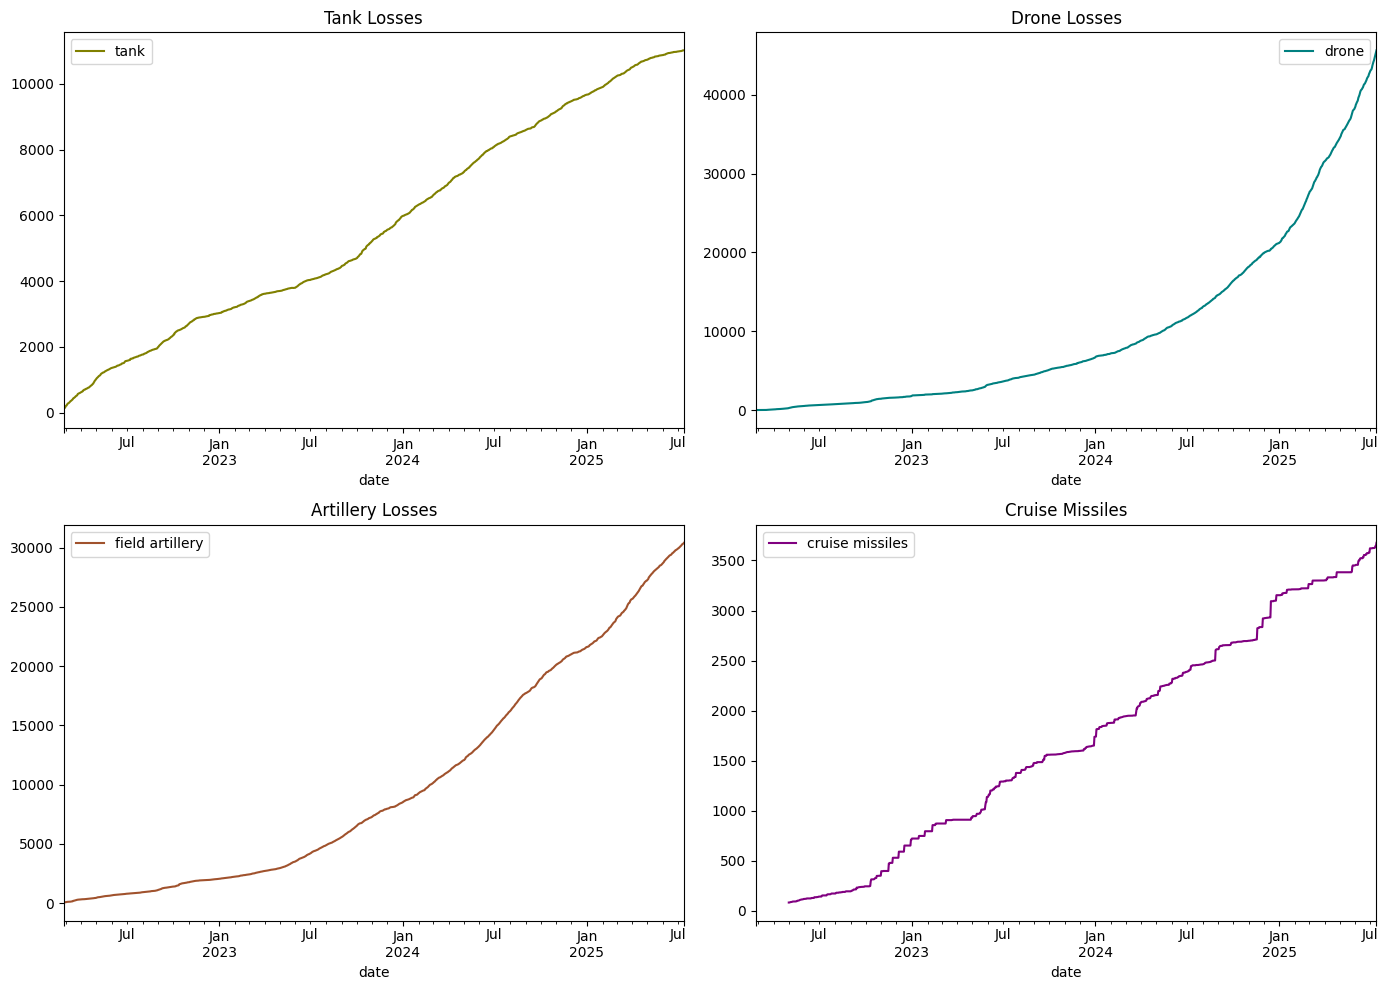

In [16]:
plt.figure(figsize=(14, 10))
equipment.plot('date', 'tank', ax=plt.subplot(2, 2, 1),
               title='Tank Losses', color='olive')
equipment.plot('date', 'drone', ax=plt.subplot(2, 2, 2),
               title='Drone Losses', color='teal')
equipment.plot('date', 'field artillery', ax=plt.subplot(2, 2, 3),
               title='Artillery Losses', color='sienna')
equipment.plot('date', 'cruise missiles', ax=plt.subplot(2, 2, 4),
               title='Cruise Missiles', color='purple')
plt.tight_layout()
plt.show()

# Time Series Analysis

In [17]:
# Create monthly aggregates
monthly = merged.resample('M', on='date').agg({
    'daily_losses': 'sum',
    'tank': 'last',
    'drone': 'last',
    'field artillery': 'last'
})

# Calculate monthly changes
monthly['tank_change'] = monthly['tank'].diff()
monthly['drone_change'] = monthly['drone'].diff()
monthly['artillery_change'] = monthly['field artillery'].diff()

print(monthly.tail(3))

            daily_losses   tank  drone  field artillery  tank_change  \
date                                                                   
2025-05-31      -35370.0  10869  38355            28641        140.0   
2025-06-30      -32420.0  10982  42936            29884        113.0   
2025-07-31     1022790.0  11018  45651            30409         36.0   

            drone_change  artillery_change  
date                                        
2025-05-31        3958.0            1425.0  
2025-06-30        4581.0            1243.0  
2025-07-31        2715.0             525.0  


/tmp/ipython-input-17-3431572778.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = merged.resample('M', on='date').agg({


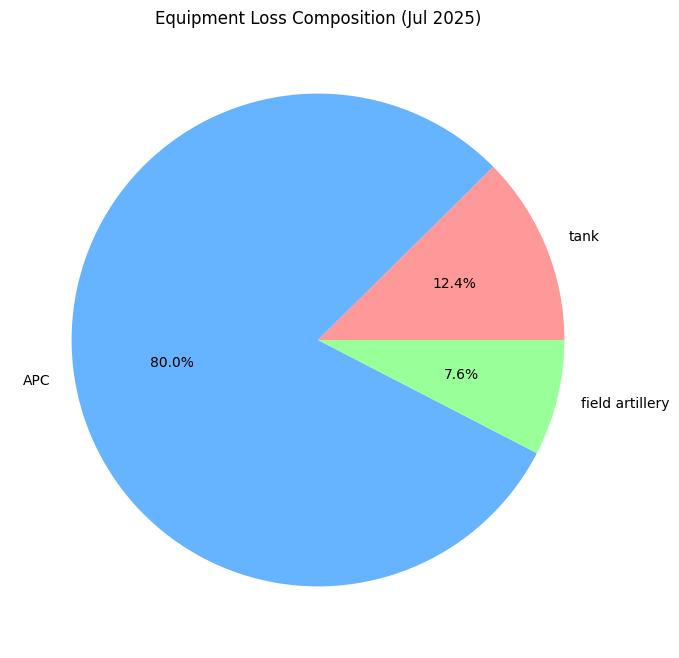

In [18]:
latest = equipment.iloc[-1][['tank', 'APC', 'field artillery', 'drone',
                            'vehicles and fuel tanks']]
latest = latest[latest > 0]

plt.figure(figsize=(10, 8))
plt.pie(latest, labels=latest.index, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Equipment Loss Composition (Jul 2025)')
plt.show()

#Correction Impact Analysis

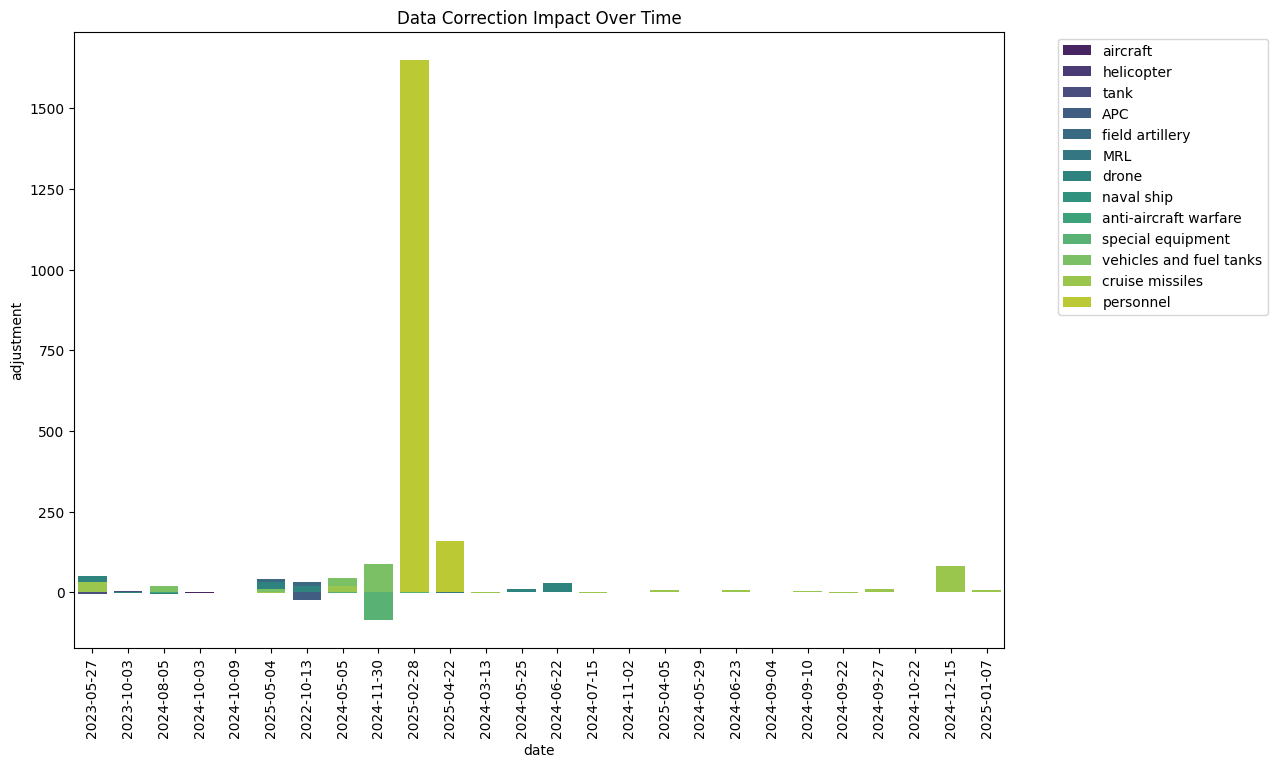

In [19]:
# Calculate correction magnitudes
corr_impact = corrections.melt(id_vars='date',
                              value_vars=corrections.columns[2:],
                              var_name='equipment',
                              value_name='adjustment')
corr_impact = corr_impact[corr_impact['adjustment'] != 0]

# Plot corrections
plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='adjustment', hue='equipment',
            data=corr_impact, dodge=False, palette='viridis')
plt.title('Data Correction Impact Over Time')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Key Insights

In [20]:
# Create period segments
merged['period'] = pd.cut(merged['date'],
                         bins=[pd.Timestamp('2025-01-01'),
                               pd.Timestamp('2025-04-01'),
                               pd.Timestamp('2025-07-15')],
                         labels=['Jan-Mar 2025', 'Apr-Jul 2025'])

# Compare periods
period_comparison = merged.groupby('period').agg({
    'daily_losses': 'mean',
    'daily_tank': 'mean',
    'daily_field artillery': 'mean',
    'daily_drone': 'mean'
}).T

/tmp/ipython-input-20-1124026476.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_comparison = merged.groupby('period').agg({


In [21]:
# 30-day projection
current_date = merged['date'].max()
projection = pd.date_range(current_date, periods=30, freq='D')

# Linear projection based on recent 30-day average
personnel_proj = [merged['personnel'].iloc[-1] + i*1320 for i in range(1, 31)]
drone_proj = [merged['drone'].iloc[-1] + i*413 for i in range(1, 31)]

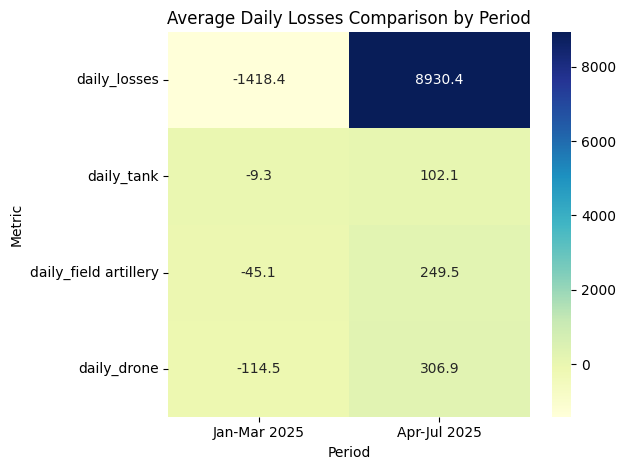

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(period_comparison, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average Daily Losses Comparison by Period")
plt.ylabel("Metric")
plt.xlabel("Period")
plt.tight_layout()
plt.show()


In [23]:
# --- Step 4: Create 30-day projection dates ---
current_date = merged['date'].max()
projection = pd.date_range(current_date + pd.Timedelta(days=1), periods=30, freq='D')

# --- Step 5: Linear projection for personnel and drones ---
personnel_proj = [merged['personnel'].iloc[-1] + i * 1320 for i in range(1, 31)]
drone_proj = [merged['drone'].iloc[-1] + i * 413 for i in range(1, 31)]

# --- Step 6: Build projection DataFrame for plotting ---
projection_df = pd.DataFrame({
    'Date': projection,
    'Projected Personnel': personnel_proj,
    'Projected Drones': drone_proj
})

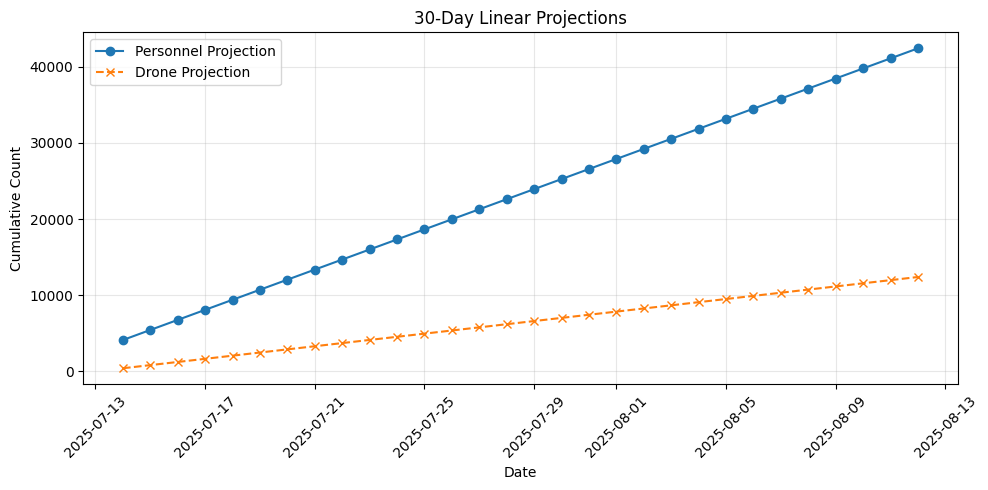

=== Period Comparison (Mean Daily Metrics) ===
period                 Jan-Mar 2025  Apr-Jul 2025
daily_losses           -1418.444444   8930.388350
daily_tank                -9.322222    102.087379
daily_field artillery    -45.133333    249.485437
daily_drone             -114.500000    306.883495

=== 30-Day Projection Sample ===
        Date  Projected Personnel  Projected Drones
0 2025-07-14                 4120               413
1 2025-07-15                 5440               826
2 2025-07-16                 6760              1239
3 2025-07-17                 8080              1652
4 2025-07-18                 9400              2065


In [24]:
# --- Step 7: Line plot of projections ---
plt.figure(figsize=(10, 5))
plt.plot(projection_df['Date'], projection_df['Projected Personnel'], label='Personnel Projection', marker='o')
plt.plot(projection_df['Date'], projection_df['Projected Drones'], label='Drone Projection', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.title('30-Day Linear Projections')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: Print numeric comparison output ---
print("=== Period Comparison (Mean Daily Metrics) ===")
print(period_comparison)

print("\n=== 30-Day Projection Sample ===")
print(projection_df.head())